In [1]:
#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math as m
from scipy.spatial.distance import cdist
from scipy import signal

#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc
import cairosvg
import time
np.set_printoptions(suppress=True)
# matplotlib.rcParams['font.family'] = [ 'sans-serif']

In [2]:
FS=7

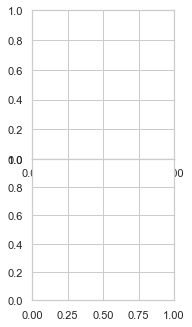

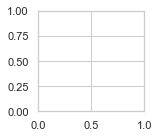

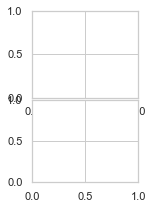

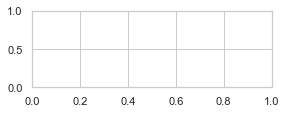

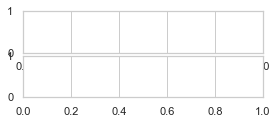

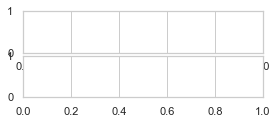

In [3]:
layout = fifi.svg_to_axes.FigureLayout('../../../Figure/Paper/method1.svg', 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])

### Setup Figure Panel A,B

In [5]:
img1 = mpimg.imread('../../Figure/Paper/MethodFigure01/SetupDesert.png')
img2 = mpimg.imread('../../Figure/Paper/MethodFigure01/Setup.jpg')

ax1=layout.axes[('fig1','a')]
ax1.imshow(img1,aspect='auto',rasterized=True)
ax1.grid(False)
ax1.axes.axis('off')

ax2=layout.axes[('fig1','b')]
ax2.imshow(img2,aspect='auto', rasterized=True)
ax2.grid(False)
ax2.axes.axis('off')

ax1.set_rasterization_zorder(-20)
ax2.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax1, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/Paper/method1.svg')

### Sensor Location - Panel C

In [7]:
traj = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/TrajectoryInt.h5")
loc=pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/WindstationLocations.h5')

# f,ax=plt.subplots(1,1)
ax=layout.axes[('figlocation','latlon')]
ax.scatter(0, 0, s=30, color="red", rasterized=True)
ax.scatter(loc.xsrc,loc.ysrc,marker='x',s=15, color="blue", rasterized=True)
ax.scatter(traj.xsrc,traj.ysrc,c=traj.odor,cmap='inferno', s=0.2,alpha=0.2,rasterized=True)

ax.set_xlabel('Longitude, m',labelpad=-7)
ax.set_ylabel('Latitude, m', labelpad=-7)
ax.ticklabel_format(useOffset=False)
# ax.yaxis.set_major_locator(MaxNLocator(3))
# ax.xaxis.set_major_locator(MaxNLocator(3))
ax.set_ylim(-40,50)
ax.grid(False)
ax.autoscale(enable=True)
# ax.legend(loc='upper left',fancybox=True, shadow=False)
# f.suptitle("Forest Sensor Location")
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-40,0,50],
                           xticks=[-40,50],
                           linewidth=1)

figurefirst.mpl_functions.set_fontsize(ax, FS)
ax.set_rasterization_zorder(-20)

layout.append_figure_to_layer(layout.figures['figlocation'], 'figlocation', cleartarget=True)
layout.write_svg('../../../Figure/Paper/method1.svg')
plt.close()

### Histogram Plots - Panel E

In [8]:
dir = '~/Documents/Myfiles/DataAnalysis/data/Sprints/HighRes/'
df1 = pd.read_hdf(dir+'Windy/WindyMASigned.h5')
df2 = pd.read_hdf(dir+'NotWindy/NotWindyMASigned.h5')

# f,(ax1,ax2)=plt.subplots(2,1)
ax1=layout.axes[('fighist','hist1')]
ax2=layout.axes[('fighist','hist2')]

n, bins, patches = ax1.hist((df1.odor), 20, density=True, facecolor='#1f77b4', alpha=0.75, rasterized=True)
n, bins, patches = ax2.hist((df2.odor), 20, density=True, facecolor='#1f77b4', alpha=0.75, rasterized=True)
ax1.grid(False)
ax2.grid(False)
mpl_functions.adjust_spines(ax1,['left'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,1.6],
                           xticks=[0,5.25,10],
                           linewidth=1)
mpl_functions.adjust_spines(ax2,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,1.6],
                           xticks=[0,5,10],
                           linewidth=1)

ax1.axvline(4.5,c='red',linestyle='--', alpha=0.5)
ax2.axvline(4.5,c='red',linestyle='--', alpha=0.5)

ax1.set_rasterization_zorder(-20)
ax2.set_rasterization_zorder(-20)
# ax1.set_xlabel('Odor Concentration, v')
ax1.set_ylabel('Frequency', labelpad=-7)
ax2.set_ylabel('Frequency', labelpad=-7)
ax2.set_xlabel('Odor Concentration, v', labelpad=2)

figurefirst.mpl_functions.set_fontsize(ax1, FS)
figurefirst.mpl_functions.set_fontsize(ax2, FS)
layout.append_figure_to_layer(layout.figures['fighist'], 'fighist', cleartarget=True)
layout.write_svg('../../../Figure/Paper/method1.svg')
plt.close()

### Wind Sensor - Panel D

In [9]:
df1 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_172919_windy_b_data.hdf")
df2 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_19591_windy_a_data.hdf")
df3 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_172458_windy_d_data.hdf")
df4 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_17112_windy_e_data.hdf")
df5 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_17327_windy_f_data.hdf")
df6 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_171735_windy_g_data.hdf")
df7 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_171353_windy_h_data.hdf")
df8 = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/DesertWind/20201020_172648_windy_i_data.hdf")

dt=df1.time_epoch.iloc[1]-df1.time_epoch.iloc[0]

arr_dat = [df1,df3,df4,df5,df6,df7,df8]
for i in range(len(arr_dat)):
    dataframe = arr_dat[i]
    time = []
    time.append(0)
    for j in range(1,len(arr_dat[i])):
        time.append(time[j-1]+dt)

    arr_dat[i]['time'] = time     

In [10]:

ax1=layout.axes[('figws','ws1')]
ax2=layout.axes[('figws','ws2')]


ax1.scatter(df1.time,df1.S2, c='darkorange',edgecolors='none', alpha=0.2,s=4, rasterized=True)
ax2.scatter(df3.time,df3.S2, edgecolors='none', alpha=0.2, s=3, rasterized=True)
ax2.scatter(df4.time,df4.S2, edgecolors='none', alpha=0.2, s=3, rasterized=True)
ax2.scatter(df5.time,df5.S2, edgecolors='none', alpha=0.2, s=3, rasterized=True)
# ax2.scatter(df6.time,df6.S2, edgecolors='none', alpha=0.2, s=3, rasterized=True)
# ax2.scatter(df7.time,df7.S2, edgecolors='none', alpha=0.2, s=3, rasterized=True)
# ax2.scatter(df8.time,df8.S2, c='green', edgecolors='none', alpha=0.2, s=3, rasterized=True)


ax1.set_xlim(0,80000)
ax2.set_xlim(0,80000)

ax1.grid(False)
ax2.grid(False)


mpl_functions.adjust_spines(ax1,['left'],
                            spine_locations={}, 
                            smart_bounds=True,
#                             xticks=[0,2000,4000,6000,8000,10000,12000],
                            yticks=[0,4,8],
                            linewidth=1)
                                 
mpl_functions.adjust_spines(ax2,['left'],
                            spine_locations={}, 
                            smart_bounds=True,
                            xticks=[0,40000,80000],
                            yticks=[0,4,8],
                            linewidth=1)

ax1.axvspan(0, 47839,  alpha=0.4, color='lightsteelblue')
ax1.axvspan(47839,80201,  alpha=0.4, color='grey')

ax1.set_title('Desert Wind Speed',pad=2)

ax1.set_rasterization_zorder(-20)
ax2.set_rasterization_zorder(-20)


figurefirst.mpl_functions.set_fontsize(ax1, FS)
figurefirst.mpl_functions.set_fontsize(ax2, FS)

layout.append_figure_to_layer(layout.figures['figws'], 'figws', cleartarget=True)

layout.write_svg('../../../Figure/Paper/method1.svg')


In [11]:
# f,(ax3,ax4)=plt.subplots(2,1)
ax3=layout.axes[('figwd','wd1')]
ax4=layout.axes[('figwd','wd2')]

ax3.scatter(df1.time ,df1.D, label='Station01', c='darkorange', edgecolors='none', alpha=0.2,s=4, rasterized=True)
ax4.scatter(df3.time ,df3.D, label='Station05', edgecolors='none', alpha=0.2,s=3, rasterized=True)
ax4.scatter(df4.time ,df4.D, label='Station06', edgecolors='none', alpha=0.2, s=3, rasterized=True)
ax4.scatter(df5.time ,df5.D, label='Station07', edgecolors='none', alpha=0.2, s=3, rasterized=True)
# ax4.scatter(df6.time ,df6.D, label='Station08', edgecolors='none', alpha=0.2,s=3, rasterized=True)
# ax4.scatter(df7.time ,df7.D, label='Station09', edgecolors='none', alpha=0.2,s=3, rasterized=True)
# ax4.scatter(df8.time ,df8.D, c='green', label='Station09', edgecolors='none', alpha=0.2, s=3, rasterized=True)


ax3.set_xlim(0,80000)
ax4.set_xlim(0,80000)
ax3.grid(False)
ax4.grid(False)

mpl_functions.adjust_spines(ax3,['left'],
                            spine_locations={'left': 5,}, 
                            smart_bounds=True,
                            xticks=[0,95000],
                            yticks=[0,180,360],
                            linewidth=1,
                           )
                                 
mpl_functions.adjust_spines(ax4,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=[0,40000,80000],
                            yticks=[0,180,360],
                            linewidth=1)


ax3.set_title('Desert Wind Direction',pad=2)
ax4.set_xlabel('Time, s', labelpad=2)
ax3.set_rasterization_zorder(-20)
ax4.set_rasterization_zorder(-20)


figurefirst.mpl_functions.set_fontsize(ax3, FS)
figurefirst.mpl_functions.set_fontsize(ax4, FS)

layout.append_figure_to_layer(layout.figures['figwd'], 'figwd', cleartarget=True)
layout.write_svg('../../../Figure/Paper/method1.svg')

### Odor Signal - Panel F

In [34]:
df = pd.read_hdf("~/Documents/Myfiles/DataAnalysis/data/TrajectoryInt.h5")

ax=layout.axes[('fig5','f')]
ax.plot(df.time,df.odor, c='#1f77b4', linewidth=0.5)
ax.set_xlim(130,150)
ax.grid(False)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=[130,140,150],
                            yticks=[0,5,10],
                            linewidth=1)
ax.axhline(4.5, linestyle='--', c='red')
ax.text(146.5,5,'Odor\nThreshold>4.5')


ax.set_xticklabels([0,1,2])
ax.set_xlabel('Time, s', labelpad=2)
ax.set_ylabel('Odor, v', labelpad=2)
ax.axvspan(136.35, 137.3,  alpha=0.2, color='red')
ax.axvspan(142,145.5,  alpha=0.2, color='green')
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig5'], 'fig5', cleartarget=True)
layout.write_svg('../../../Figure/Paper/method1.svg')

In [36]:
# display(SVG('../../Figure/Paper/method11.svg'))

In [38]:
# cairosvg.svg2pdf(url='../../../Figure/Paper/method1.svg', write_to='method1.pdf')